# kNN(k-Nearest Neighbor) 알고리즘을 사용한 붓꽃 품종 분류

* `sklearn.datasets.load_iris()` 함수를 사용해서 iris(붓꽃) 데이터를 로드 
* iris 데이터 탐색 
    * 특성의 개수, 이름, 샘플의 개수, 타겟의 개수, 타겟의 종류 
* iris 데이터를 훈련 셋/테스트 셋 분리 (8:2)
    * 품종별 비율이 훈련 셋과 테스트 셋에서 비슷하게 유지되도록 
* 훈련 셋으로 kNN 모델을 학습시킴 
* 모델 평가 
    * 훈련 셋의 평가 점수 
    * 테스트 셋의 예측 결과를 계산
    * 테스트 셋의 평가 점수 
* k 값을 변화시켰을 때 모델 성능 비교
* 특성 스케일링을 했을 때와 하지 않았을 때 모델 성능 비교 


# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# iris 데이터 셋

In [ ]:
iris = load_iris()   #> {'DESCR': ...., 'data': ..., 'target': ..., }

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['filename']

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

In [ ]:
X = iris['data']

In [ ]:
X.shape

(150, 4)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
y = iris['target']

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y.shape

(150,)

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# numpy 배열을 pandas DataFrame으로 변환 
df = pd.DataFrame(data=X, columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


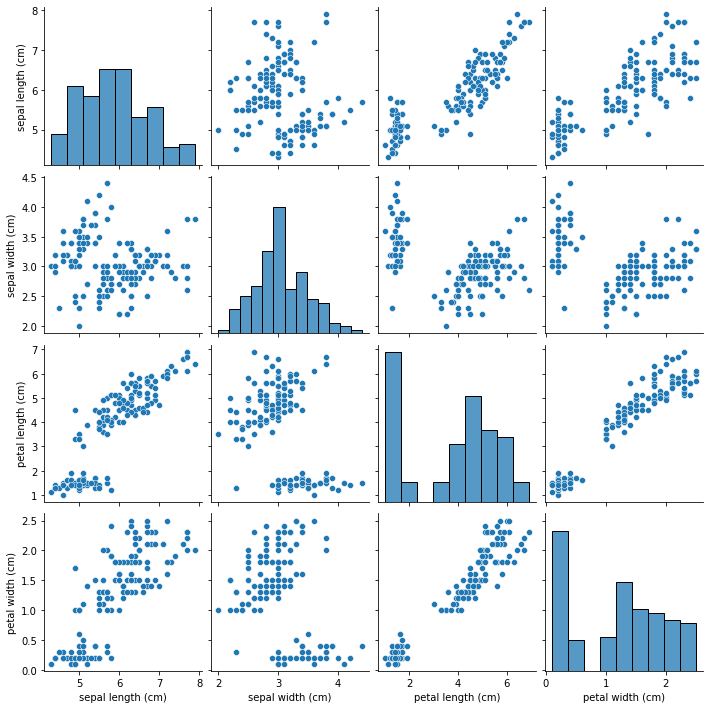

In [ ]:
# seaborn 패키지 기능을 이용하려면 DataFrame이 있어야 함
sns.pairplot(data=df)
plt.show()

pair plot에 iris의 품종을 색깔(hue)로 구분 

In [ ]:
df2 = np.c_[X, y]
df2 = pd.DataFrame(data=df2, columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)', 'target'])

In [ ]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


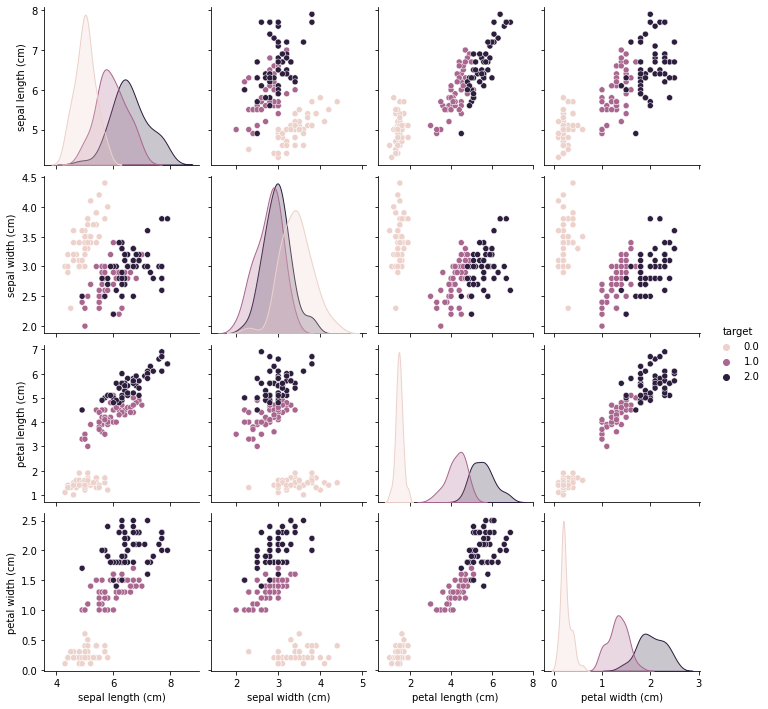

In [ ]:
sns.pairplot(data=df2, hue='target')
plt.show()

# Train/Test Split

In [ ]:
X.shape  # data의 모양

(150, 4)

In [ ]:
y.shape  # target의 모양

(150,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [ ]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [ ]:
# stratified sampling 확인
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

# kNN 모델 학습/평가

In [ ]:
knn_clf = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn_clf.fit(X=X_train, y=y_train)  # 훈련 셋으로 모델을 학습시킴

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 훈련 셋 평가 점수
knn_clf.score(X=X_train, y=y_train)  # 96.7% 정확도 
#> 훈련을 통해서 기억시켰고, 예측 accuracy가 97%로 나옴 

0.9666666666666667

In [ ]:
knn_clf.score(X=X_test, y=y_test)

0.9666666666666667

In [ ]:
# 훈련 데이터의 예측값
train_pred = knn_clf.predict(X=X_train)
train_pred

array([0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# 훈련 데이터의 실제값
y_train

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# 훈련 셋에서의 confusion matrix
confusion_matrix(y_true=y_train, y_pred=train_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  2, 38]])

In [ ]:
report = classification_report(y_true=y_train, y_pred=train_pred, target_names=iris['target_names'])
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.95      0.95        40
   virginica       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
# 테스트 셋의 평가 점수 
knn_clf.score(X_test, y_test)  #> 1.0

1.0

* 과대적합(Overfitting): 훈련 셋의 평가 점수가 테스트 셋의 평가 점수보다 많이 높은 경우
* 과소적합(Underfitting): 훈련 셋의 평가 점수가 테스트 셋의 평가 점수보다 낮은 경우. 또는 훈련 셋과 테스트 셋의 평가 점수가 모두 낮은 경우
    * 샘플의 개수가 작으면 과소적합이 나타나는 경우가 있음 

In [ ]:
test_pred = knn_clf.predict(X_test)
test_pred  # 테스트 셋 예측값

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [ ]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

# k 값에 따른 성능 변화

In [ ]:
ks = (1, 5, 11, 21)  # kNN에서 사용할 k 값
train_scores = []  # 학습 셋의 점수(정확도)를 저장할 리스트 
test_scores = []   # 테스트 셋의 점수(정확도)를 저장할 리스트 
for k in ks: 
    knn_clf = KNeighborsClassifier(n_neighbors=k)  # 모델 생성 
    knn_clf.fit(X_train, y_train)  # 모델 훈련 
    tr_score = knn_clf.score(X_train, y_train)  # 훈련 셋 점수 
    train_scores.append(tr_score)
    te_score = knn_clf.score(X_test, y_test)    # 테스트 셋 점수
    test_scores.append(te_score)

print('train accuracies', train_scores)
print('test accuracies', test_scores)

train accuracies [1.0, 0.9666666666666667, 0.975, 0.975]
test accuracies [0.9666666666666667, 1.0, 0.9666666666666667, 0.9333333333333333]


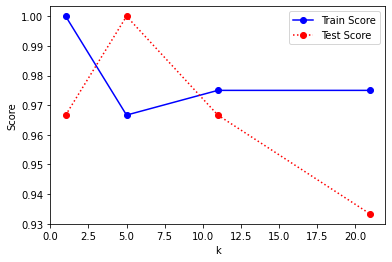

In [ ]:
plt.plot(ks, train_scores, 'bo-', label='Train Score')
plt.plot(ks, test_scores, 'ro:', label='Test Score')

plt.legend()
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

n: 훈련 셋의 샘플 개수가 n개일 때, kNN 알고리즘에서 많이 선택하는 k 값: 

$\sqrt{n}$

# 표준화를 적용

In [ ]:
std_scaler = StandardScaler()   # Scaler 객체 생성 

In [ ]:
X_train_scaled = std_scaler.fit_transform(X_train)  # 훈련 셋 표준화(Scaling) 

In [ ]:
np.mean(X_train_scaled, axis=0)

array([-1.20829273e-15, -2.03679666e-15,  4.99600361e-16,  1.67458640e-15])

In [ ]:
np.std(X_train_scaled, axis=0)

array([1., 1., 1., 1.])

In [ ]:
knn_clf = KNeighborsClassifier()   # 모델 생성 

In [ ]:
knn_clf.fit(X_train_scaled, y_train)  # 모델 학습 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 훈련 셋 평가 점수(정확도)
knn_clf.score(X_train_scaled, y_train)

0.975

In [ ]:
# 테스트 셋 평가 점수(정확도)
knn_clf.score(X_test, y_test)
#> 훈련 셋을 scaling 후 학습시킨 모델을 평가할 때는 테스트 셋도 반드시(!) scaling해야 함 

0.3333333333333333

In [ ]:
# 테스트 셋을 훈련 셋의 평균과 표준편차를 사용해서 표준화
X_test_scaled = std_scaler.transform(X_test)
# scale된 테스트 셋으로 평가 
knn_clf.score(X_test_scaled, y_test)

0.9333333333333333

표준화가 적용된 훈련 셋/테스트 셋에서 k값을 변화시키면서 평가